<a href="https://colab.research.google.com/github/NarongkiatPW/DADS/blob/DADS6003_Machine_Learning/Assignment2_Logistic_Regression_6610422004_Narongkiat_Phuengwong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# โจทย์:
### ให้นักศึกษาทำตาม link (ด้านล่าง) จนได้ผลลัพธ์ของภาพกราฟตามที่แสดงใน link
  \\
    a.) โดย น.ศ. สามารถเลือกหุ้น (ทั่วโลก) ได้ตามใจชอบมา 1 หุ้น และจะใช้ data ย้อนหลังกี่วันก็ได้ แต่ time frame (window) ต้องเป็น 1 ชั่วโมงเหมือนกันทุกคน (ตามที่กำหนดไว้ใน starter kit link ข้างบน) แล้วแสดงผลลัพธ์ของกราฟ
  \\
  \\
    b.) เพิ่ม feature (column) ต่างๆ ที่เราสนใจ จากนั้นให้ทำซ้ำตามข้อ (a.) แล้วแสดงผลลัพธ์ของกราฟเปรียบเทียบกับกราฟในข้อ a.

จากเว็บ
https://blog.quantinsti.com/machine-learning-logistic-regression-python/

\\
Initial Code:
https://github.com/ekaratnida/Applied-machine-learning/blob/master/Week05-Logistic/Stock_forecast.ipynb

In [61]:
!pip install requests
!pip install lxml
!pip install yfinance

In [62]:
import pandas as pd
import numpy as np
import yfinance as yf

**Step 1 Import Data**

In [123]:
data = yf.Ticker('EGCO.BK')

In [125]:
interval = '1h'

start = '2023-1-1'
end = '2023-12-31'

df = data.history(interval='1h',start=start,end=end)
df = df.loc[:,['Open','High','Low','Close']]
df.head()

,Open,High,Low,Close
Datetime,,,,
2023-01-03 10:00:00+07:00,173.5,173.5,173.0,173.0
2023-01-03 11:00:00+07:00,173.0,173.0,172.0,172.5
2023-01-03 12:00:00+07:00,172.0,172.5,172.0,172.0
2023-01-03 14:00:00+07:00,172.5,172.5,172.0,172.0
2023-01-03 15:00:00+07:00,172.5,173.0,172.0,172.5


In [126]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod=10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
df.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-06 10:00:00+07:00,178.0,178.0,177.0,177.5,176.50,0.773516,71.459922,0.5,0.5
2023-01-06 11:00:00+07:00,177.5,177.5,177.0,177.5,176.80,0.704228,71.459922,0.0,-0.5
2023-01-06 12:00:00+07:00,177.5,177.5,176.5,177.0,177.10,0.505331,64.040698,0.0,0.0
2023-01-06 14:00:00+07:00,177.0,177.0,176.0,176.5,177.35,-0.431314,57.417089,0.0,-0.5
2023-01-06 15:00:00+07:00,177.0,177.0,176.0,176.5,177.25,-0.541700,57.417089,0.5,0.0


**Step 2: Define Predictor/Independent Variables**

We will use 10-days moving average, correlation, relative strength index (RSI), the difference between the open price of yesterday and today, the difference between the close price of yesterday and the open price of today. Also, open, high, low, and close prices will be used as indicators to make the prediction.

In [ ]:
# ติดตั้ง ta-lib

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib as ta

In [127]:
X = df.iloc[:,:9]
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
X.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-06 10:00:00+07:00,178.0,178.0,177.0,177.5,176.50,0.773516,71.459922,0.5,0.5
2023-01-06 11:00:00+07:00,177.5,177.5,177.0,177.5,176.80,0.704228,71.459922,0.0,-0.5
2023-01-06 12:00:00+07:00,177.5,177.5,176.5,177.0,177.10,0.505331,64.040698,0.0,0.0
2023-01-06 14:00:00+07:00,177.0,177.0,176.0,176.5,177.35,-0.431314,57.417089,0.0,-0.5
2023-01-06 15:00:00+07:00,177.0,177.0,176.0,176.5,177.25,-0.541700,57.417089,0.5,0.0


In [128]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [129]:
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.09965187738833177]
1,High,[0.488934398724655]
2,Low,[0.9204649138526241]
3,Close,[-1.0300174914352267]
4,S_10,[-0.28681064532457146]
5,Corr,[-0.17150357212634615]
6,RSI,[-0.018874844113341047]
7,Open-Close,[0.15583548309031248]
8,Open-Open,[0.10567301284050597]


In [131]:
# Specify the date for prediction
prediction_date = '2024-12-1'
probability = model.predict_proba(X_test)
print(probability)

[[0.70348605 0.29651395]
 [0.75503259 0.24496741]
 [0.64823304 0.35176696]
 [0.77054137 0.22945863]
 [0.63577129 0.36422871]
 [0.72215908 0.27784092]
 [0.57388149 0.42611851]
 [0.64866819 0.35133181]
 [0.80966659 0.19033341]
 [0.55829629 0.44170371]
 [0.64864914 0.35135086]
 [0.66145744 0.33854256]
 [0.76361038 0.23638962]
 [0.52377436 0.47622564]
 [0.59247387 0.40752613]
 [0.61326268 0.38673732]
 [0.55218626 0.44781374]
 [0.76229145 0.23770855]
 [0.62084718 0.37915282]
 [0.80302739 0.19697261]
 [0.77859729 0.22140271]
 [0.57982106 0.42017894]
 [0.60255284 0.39744716]
 [0.73420038 0.26579962]
 [0.71511361 0.28488639]
 [0.50418354 0.49581646]
 [0.6652379  0.3347621 ]
 [0.69152705 0.30847295]
 [0.55193146 0.44806854]
 [0.76128929 0.23871071]
 [0.53885026 0.46114974]
 [0.74514114 0.25485886]
 [0.41286589 0.58713411]
 [0.5410549  0.4589451 ]
 [0.69797787 0.30202213]
 [0.7294789  0.2705211 ]
 [0.52486218 0.47513782]
 [0.67419769 0.32580231]
 [0.6569126  0.3430874 ]
 [0.65890518 0.34109482]


In [132]:
predicted = model.predict(X_test)
predicted

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [133]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[270  16]
 [133  14]]
              precision    recall  f1-score   support

          -1       0.67      0.94      0.78       286
           1       0.47      0.10      0.16       147

    accuracy                           0.66       433
   macro avg       0.57      0.52      0.47       433
weighted avg       0.60      0.66      0.57       433



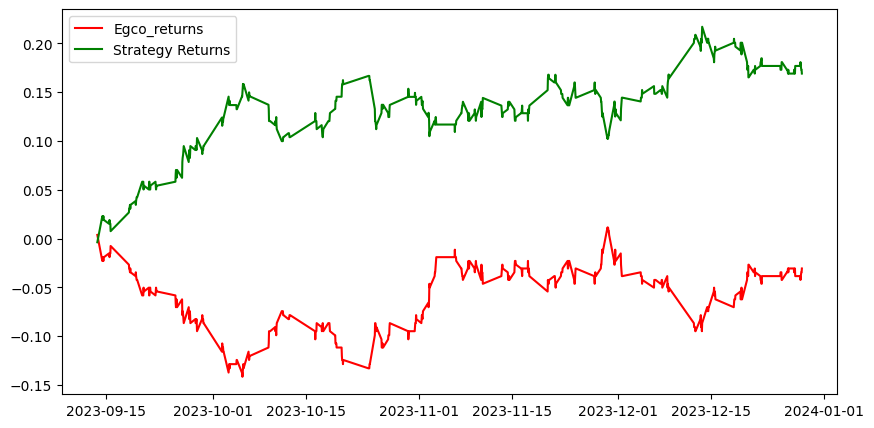

In [136]:
df['Predicted_Signal'] = model.predict(X)
df['Egco_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Egco_returns = np.cumsum(df[split:]['Egco_returns'])

df['Startegy_returns'] = df['Egco_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Egco_returns, color='r',label = 'Egco_returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [138]:
#เลือกหุ้น ปตท.

data2 = yf.Ticker('PTT.BK')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df2 = data2.history(interval=interval,start=start,end=end)
df2 = df2.loc[:,['Open','High','Low','Close']]
df2['PTT_Y'] = np.where(df2['Close'].shift(-1) > df2['Close'],1,-1)
df2.head()

,Open,High,Low,Close,PTT_Y
Datetime,,,,,
2023-01-03 10:00:00+07:00,33.5,33.50,32.75,32.75,1
2023-01-03 11:00:00+07:00,33.0,33.25,32.75,33.00,-1
2023-01-03 12:00:00+07:00,33.0,33.00,32.75,33.00,-1
2023-01-03 14:00:00+07:00,33.0,33.00,32.75,32.75,-1
2023-01-03 15:00:00+07:00,33.0,33.00,32.75,32.75,-1


In [140]:
merged_df = pd.merge(df.iloc[:,:9],df2['PTT_Y'],on='Datetime', how='inner')
merged_df.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open,PTT_Y
Datetime,,,,,,,,,,
2023-01-06 10:00:00+07:00,178.0,178.0,177.0,177.5,176.50,0.773516,71.459922,0.5,0.5,1
2023-01-06 11:00:00+07:00,177.5,177.5,177.0,177.5,176.80,0.704228,71.459922,0.0,-0.5,-1
2023-01-06 12:00:00+07:00,177.5,177.5,176.5,177.0,177.10,0.505331,64.040698,0.0,0.0,1
2023-01-06 14:00:00+07:00,177.0,177.0,176.0,176.5,177.35,-0.431314,57.417089,0.0,-0.5,-1
2023-01-06 15:00:00+07:00,177.0,177.0,176.0,176.5,177.25,-0.541700,57.417089,0.5,0.0,-1


In [141]:
X2 = merged_df.iloc[:,:10]
y2 = np.where(merged_df['Close'].shift(-1) > merged_df['Close'],1,-1)
X2.head()

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open,PTT_Y
Datetime,,,,,,,,,,
2023-01-06 10:00:00+07:00,178.0,178.0,177.0,177.5,176.50,0.773516,71.459922,0.5,0.5,1
2023-01-06 11:00:00+07:00,177.5,177.5,177.0,177.5,176.80,0.704228,71.459922,0.0,-0.5,-1
2023-01-06 12:00:00+07:00,177.5,177.5,176.5,177.0,177.10,0.505331,64.040698,0.0,0.0,1
2023-01-06 14:00:00+07:00,177.0,177.0,176.0,176.5,177.35,-0.431314,57.417089,0.0,-0.5,-1
2023-01-06 15:00:00+07:00,177.0,177.0,176.0,176.5,177.25,-0.541700,57.417089,0.5,0.0,-1


In [142]:
split2 = int(0.7*len(merged_df))
X_train2, X_test2, y_train2, y_test2 = X2[:split2], X2[split2:], y2[:split2], y2[split2:]

model2 = LogisticRegression(max_iter=1000)
model2 = model2.fit (X_train2,y_train2)
pd.DataFrame(zip(X2.columns, np.transpose(model2.coef_)))

,0,1
0,Open,[-0.10065547441503192]
1,High,[0.4346513065621032]
2,Low,[0.938956634598902]
3,Close,[-1.010098908844236]
4,S_10,[-0.2698325183551225]
5,Corr,[-0.1924447067181372]
6,RSI,[-0.01903823554504244]
7,Open-Close,[0.13737877211811056]
8,Open-Open,[0.12732906026113905]
9,PTT_Y,[0.2653174867013582]


In [ ]:
# Specify the date for prediction
prediction_date2 = '2024-12-1'
probability2 = model2.predict_proba(X_test2)
print(probability2)

In [144]:
predicted2 = model2.predict(X_test2)
predicted2

array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [145]:
print(metrics.confusion_matrix(y_test2, predicted2))
print(metrics.classification_report(y_test2, predicted2))

[[268  18]
 [126  21]]
              precision    recall  f1-score   support

          -1       0.68      0.94      0.79       286
           1       0.54      0.14      0.23       147

    accuracy                           0.67       433
   macro avg       0.61      0.54      0.51       433
weighted avg       0.63      0.67      0.60       433



In [146]:
print('Model Accuracy')
print(f'Model_1 {round(model.score(X_test,y_test)*100,2)} %')
print(f'Model_2 {round(model2.score(X_test2,y_test2)*100,2)} %')

Model Accuracy
Model_1 65.59 %
Model_2 66.74 %


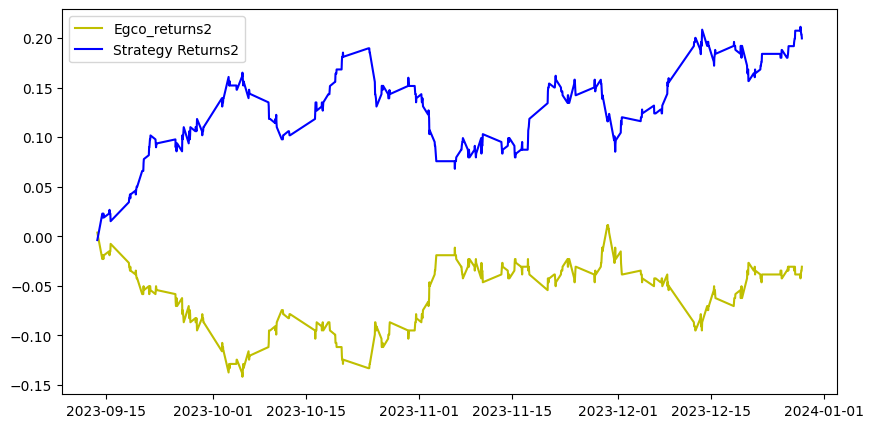

In [148]:
merged_df['Predicted_Signal'] = model2.predict(X2)
merged_df['Egco_returns'] = np.log(merged_df['Close']/merged_df['Close'].shift(1))
Cumulative_Egco_PTT_returns2 = np.cumsum(merged_df[split:]['Egco_returns'])

merged_df['Startegy_returns'] = merged_df['Egco_returns']* merged_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_PTT_returns2 = np.cumsum(merged_df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Egco_PTT_returns2, color='y',label = 'Egco_returns2')
plt.plot(Cumulative_Strategy_PTT_returns2, color='b', label = 'Strategy Returns2')
plt.legend()
plt.show()

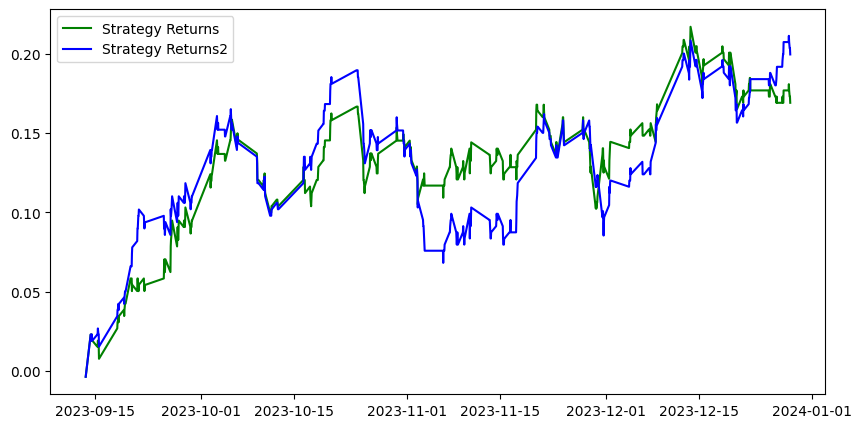

In [149]:
#เปรียบเทียบ Strategy Returns ของ model1, model2
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_Strategy_PTT_returns2, color='b', label = 'Strategy Returns2')
plt.legend()
plt.show()